In [61]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [112]:
def cyclePoints(x, y):
    """
        Cycles points in 2 directions (forwards and backwards)
        
        Given 2 dimensional arrays, x and y, the "x" and "y" values are a set of arrays 
        containing three points each representing a polygon. This function finds the best mapping 
        from x and y by using the euclidean distance and cycling the points in "y" in a forward and backwards
        direction.
        
        Parameters
        ----------
        x : int array
          A 2-D array containing 3 points on a plane that the user has selected.
            
        y : int array
          A 2-D array containing 3 points that are a representation of what "x" should be after a 
          certain number of frames. 
          
        
        Returns
        -------
        int 
            d_min, the minimum distance between a vertices in x and y
        int
            i_min, the location of the starting vertex where the minimum value occurs from
    
    """
    d_min = math.inf
    i_min = 0
    n = len(x)
    
    for i in range(0, n):
        for l in range(0, 2):
            d = 0
            for j in range(0, n):
                current_x = x[j]
                
                # Use foward cycling if 0
                # Use reverse cycling if 1
                current_y = y[(i + j) % n] if l == 0 else y[(i - j) % n]
                
                result = np.array(current_x) - np.array(current_y) 
                d = d + (np.sum(current_y)**2) # Calculate the euclidean distance

            if (d < d_min):
                d_min = d
                i_min = i
            
    return d_min, i_min

In [113]:
x = [[309,189], [310,267], [297,267]] # points on the left screen
y = [[375,189], [350,267], [380,267]] # points on the right screen

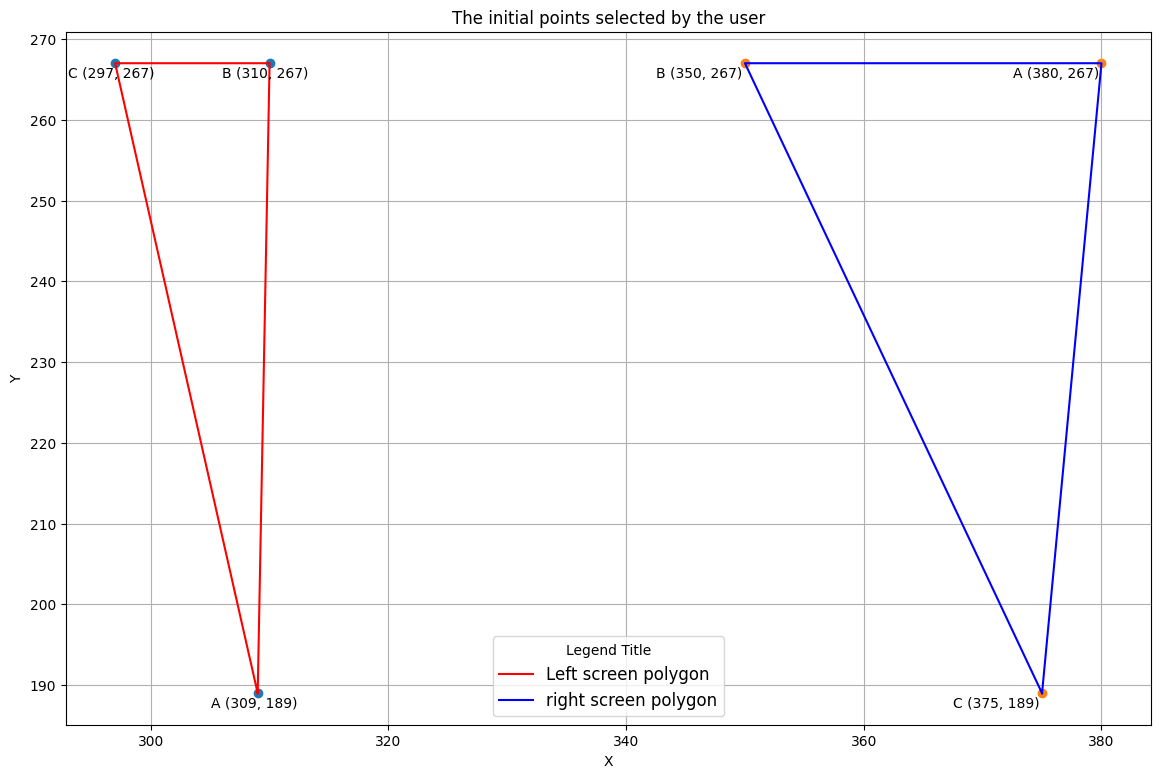

In [114]:
# Define the coordinates of the triangle vertices
x_1 = [309, 310, 297]    #x-coordinates
y_1 = [189, 267, 267]    # y-coordinates

x_2 = [375, 350, 380]    #x-coordinates
y_2 = [189, 267, 267]    # y-coordinates

plt.figure(figsize=(14, 9))

labels_left = ['A', 'B', 'C']
labels_right = ['C', 'B', 'A']
           
# Plot the triangle
plt.plot(x_1 + [x_1[0]], y_1 + [y_1[0]], 'r-', label="Left screen polygon")  # Connect the last point to the first point to close the triangle
plt.plot(x_2 + [x_2[0]], y_2 + [y_2[0]], 'b-', label="right screen polygon")  # Connect the last point to the first point to close the triangle

plt.scatter(x_1, y_1)
plt.scatter(x_2, y_2)

# Annotate the points on the graph
for i in range(len(x)):
    plt.annotate(f"{labels_left[i]} ({x_1[i]}, {y_1[i]})", (x_1[i] - 1.5 , y_1[i]), textcoords="offset points", xytext=(10,-10), ha='center')
    plt.annotate(f"{labels_right[i]} ({x_2[i]}, {y_2[i]})", (x_2[i] - 5, y_2[i]), textcoords="offset points", xytext=(10,-10), ha='center')

    
plt.legend(loc='lower center', title='Legend Title', fontsize='large')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('The initial points selected by the user')
plt.grid(True)
plt.show()

In [115]:
min_dist, tuple_index = cyclePoints(x, y)
y_mapping = []

In [116]:
if (tuple_index == 0): 
    y_mapping = y[0:]
elif (tuple_index == (len(y) - 1)): # If the tuple_index is the last element
    y_mapping = [y[tuple_index]] + y[0:tuple_index]
else:
    y_mapping = y[tuple_index: len(y)] + y[0 : tuple_index]

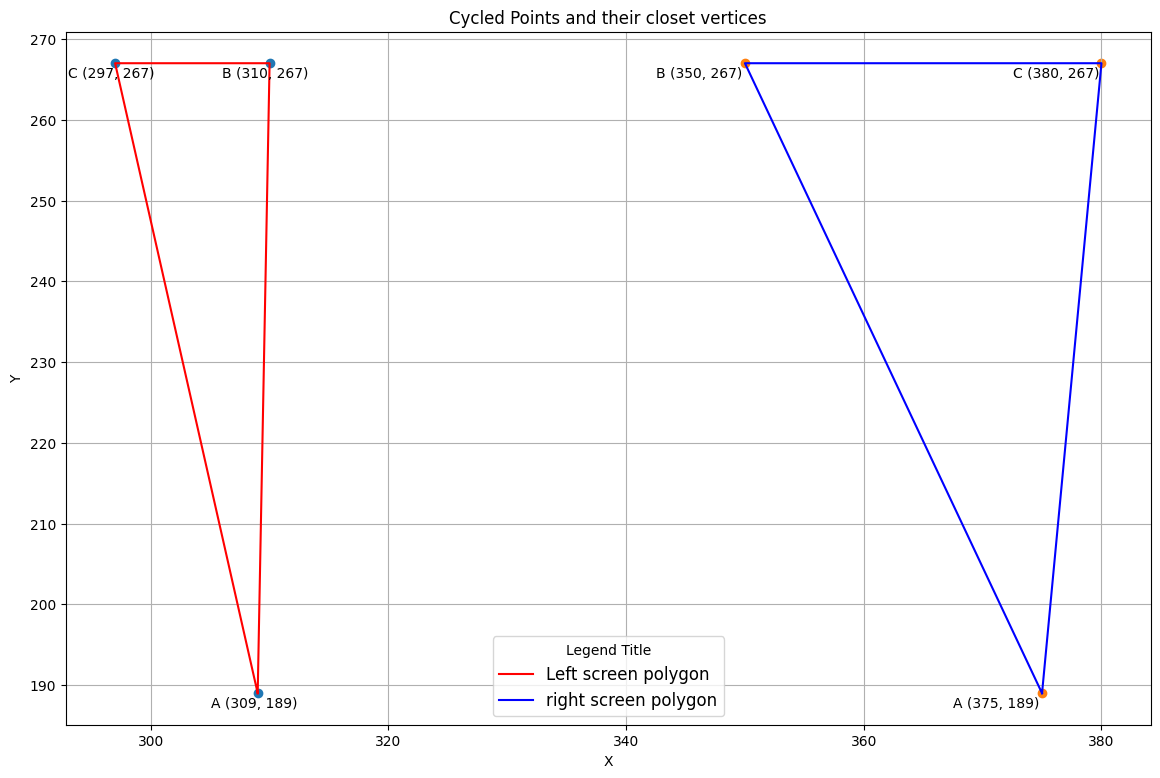

In [117]:
# Define the coordinates of the triangle vertices
x_1 = [309, 310, 297]    # x-coordinates
y_1 = [189, 267, 267]    # y-coordinates

x_2 = [375, 350, 380]    # x-coordinates
y_2 = [189, 267, 267]    # y-coordinates

plt.figure(figsize=(14, 9))

labels_left = ['A', 'B', 'C']
labels_right = ['A', 'B', 'C']
           
# # Plot the triangle
plt.plot(x_1 + [x_1[0]], y_1 + [y_1[0]], 'r-', label="Left screen polygon")  # Connect the last point to the first point to close the triangle
plt.plot(x_2 + [x_2[0]], y_2 + [y_2[0]], 'b-', label="right screen polygon")  # Connect the last point to the first point to close the triangle

plt.scatter(x_1, y_1)
plt.scatter(x_2, y_2)

for i in range(len(x)):
    # Annotate points on the graph
    plt.annotate(f"{labels_left[i]} ({x_1[i]}, {y_1[i]})", (x_1[i] - 1.5 , y_1[i]), textcoords="offset points", xytext=(10,-10), ha='center')
    plt.annotate(f"{labels_right[i]} ({x_2[i]}, {y_2[i]})", (x_2[i] - 5, y_2[i]), textcoords="offset points", xytext=(10,-10), ha='center')

    
plt.legend(loc='lower center', title='Legend Title', fontsize='large')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cycled Points and their closet vertices')
plt.grid(True)
plt.show()

In [118]:
print("f: ", x, " -> ", y_mapping)

f:  [[309, 189], [310, 267], [297, 267]]  ->  [[375, 189], [350, 267], [380, 267]]


In [119]:
def temp_linear_inter(x_1, x_T, t, T):
    """
    Calculate temporal interpolation

    Given 4 values, it will calculate the temporal interpolation at a specific frame by using the formula


    Parameters
    ----------
    x_1 : int
      The value of the first frame

    x_T : int
      The value at frame "T"

    t : int
      The frame you want to make the estimate for

    T : int array
      A frame value


    Returns
    -------
    int 
        x_t, the estimated value of value at frame "t"

    """
    x_t = x_1 + (((x_T - x_1) * (t-1)) /(T-1))   
    return x_t

In [120]:
temp_linear_inter(1, 40, 15, 50) #1 at first frame, 40 at the 50th frame, solve for the 15th frame

12.142857142857142

In [121]:
def generateCoordinates(x_1, y_1, x_2, y_2, frame):
    
    frameTriangle_x = []
    frameTriangle_y = []
    i = 0
    while i < len(x_1):
        frameTriangle_x.append(temp_linear_inter(x_1[i], x_2[i], frame, 5))
        frameTriangle_y.append(temp_linear_inter(y_1[i], y_2[i], frame, 5))
        i += 1
                               
    return frameTriangle_x,frameTriangle_y

Frame:  1
[309.0, 310.0, 297.0]
[189.0, 267.0, 267.0]
Frame:  2
[325.5, 320.0, 317.75]
[189.0, 267.0, 267.0]
Frame:  3
[342.0, 330.0, 338.5]
[189.0, 267.0, 267.0]
Frame:  4
[358.5, 340.0, 359.25]
[189.0, 267.0, 267.0]
Frame:  5
[375.0, 350.0, 380.0]
[189.0, 267.0, 267.0]


Text(0.5, 1.0, 'Temporal Interpolation over 5 frames')

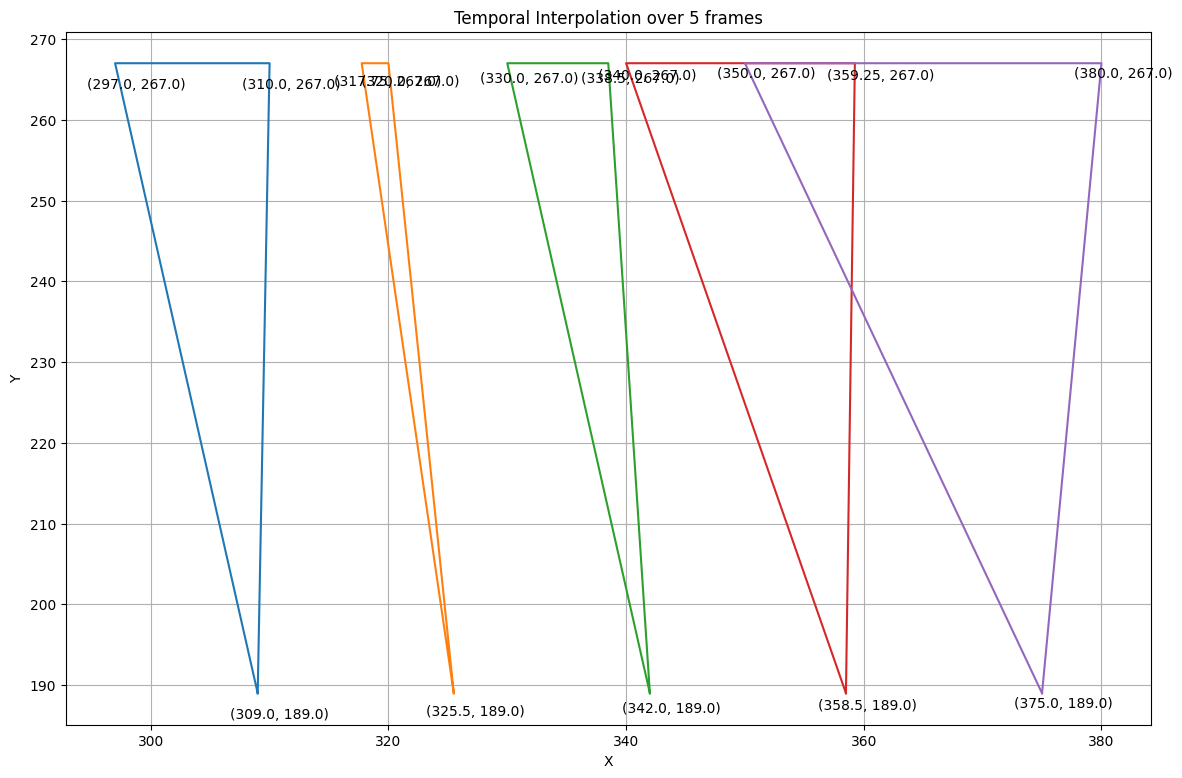

In [122]:
i = 1
plt.figure(figsize=(14, 9))
while i <= 5:
    triangle_x, triangle_y = generateCoordinates(x_1, y_1, x_2, y_2, i)
    print("Frame: ", i)
    print(triangle_x)
    print(triangle_y)
    plt.plot(triangle_x + [triangle_x[0]], triangle_y + [triangle_y[0]]) 
    for j in range(len(x_1)):
        #annotate frame
        plt.annotate(f"({triangle_x[j]}, {triangle_y[j]})", (triangle_x[j] - 3.5 , triangle_y[j]), textcoords="offset points", xytext=(10,(i*2) - 20), ha='left')
    i += 1


plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Temporal Interpolation over 5 frames')

## Alternative Image

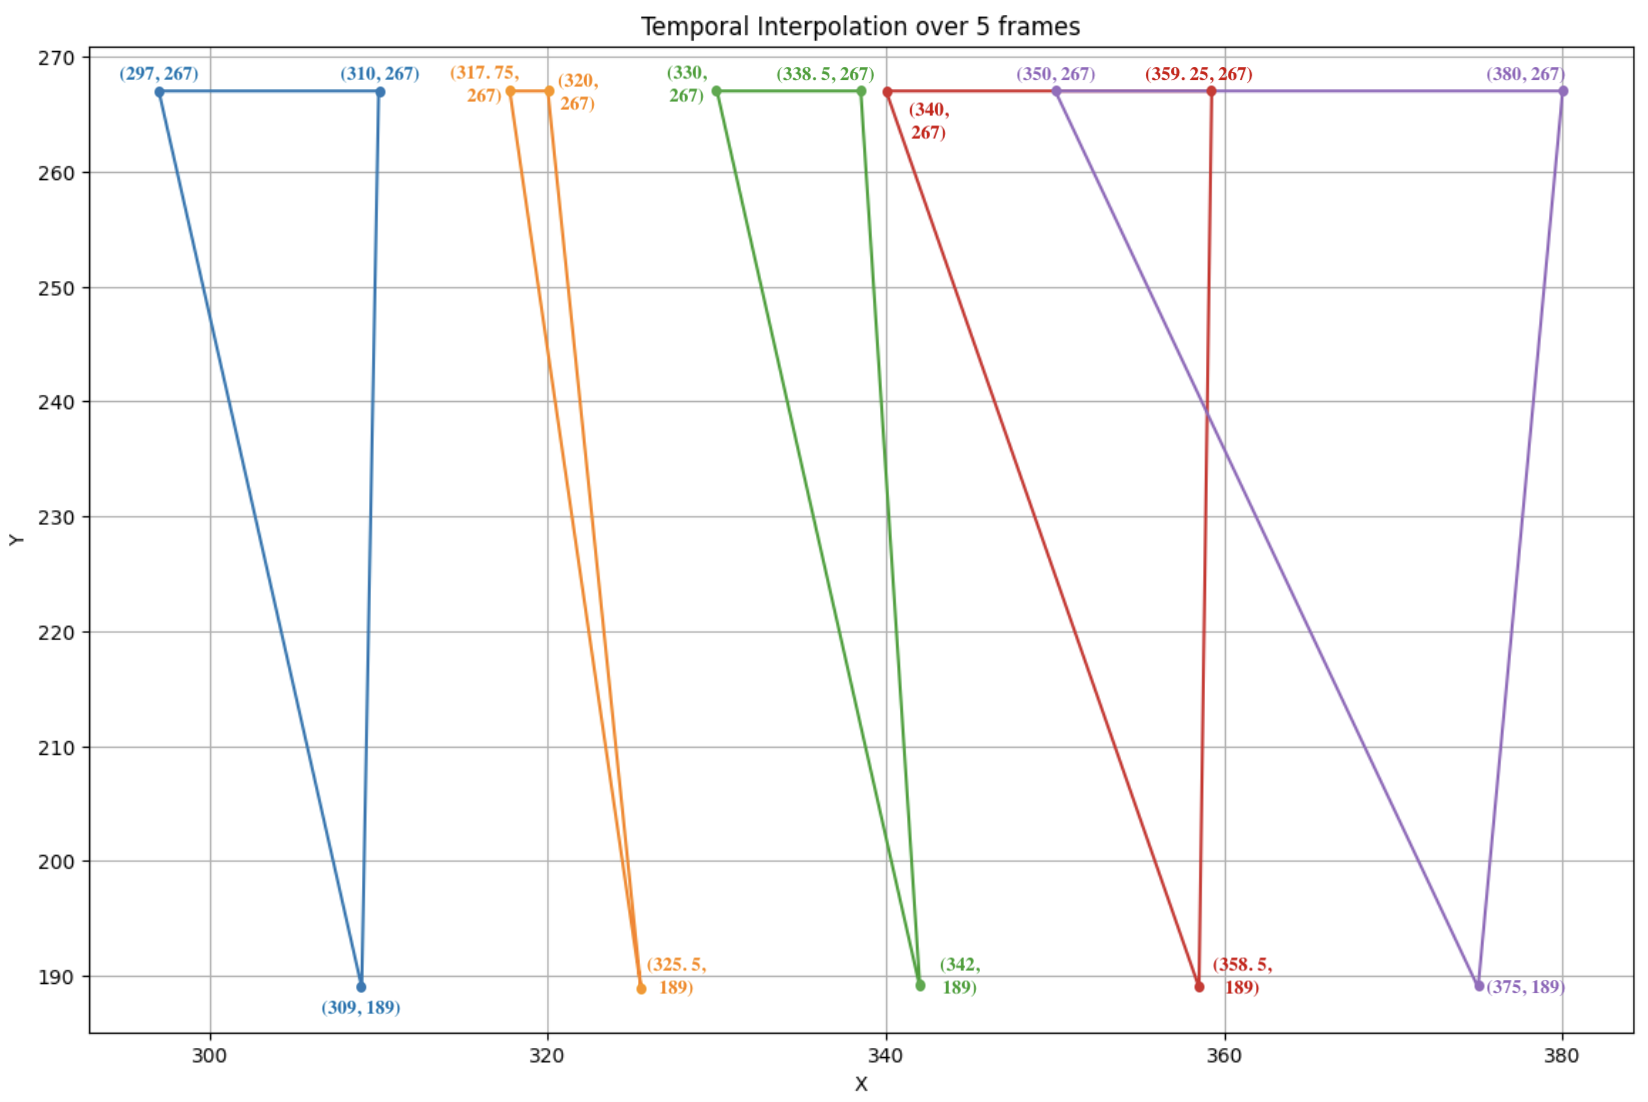